<a href="https://colab.research.google.com/github/bhimrazy/web-scraping-using-python/blob/main/Web_Scraping_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping with Python

Objective : To scrape List of American films of 2022

In [5]:
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError
from bs4 import BeautifulSoup

URL  = "https://en.wikipedia.org/wiki/List_of_American_films_of_2022"


def crawl(url):
  try:
      html = urlopen(URL)
      soup = BeautifulSoup(html.read(), 'html.parser')
      return soup
  except HTTPError as e:
    print(e)
  except URLError as e:
    print('The server could not be found!')
  else:
    print('It Worked!')

soup = crawl(URL)

In [11]:
tables = soup.find_all('table',{"class":"wikitable"})

In [61]:
# Extracting Highest-grossing films of 2022
hg_table = tables[0]
rows = hg_table.find_all('tr')
header = [h.text.strip() for h in rows[0].find_all('th')] 
highest_grosser_datas=[]

for r in rows[1:]:
  data = {}
  rank = r.find('th').text.strip()
  data[header[0]] = rank
  for i,c in enumerate(r.find_all("td")):
    data[header[i+1]] = c.text.strip()
  print(data)
  highest_grosser_datas.append(data)

{'Rank': '1', 'Title': 'Top Gun: Maverick*', 'Distributor': 'Paramount', 'Domestic Gross': '$716,351,712'}
{'Rank': '2', 'Title': 'Doctor Strange in the Multiverse of Madness', 'Distributor': 'Disney', 'Domestic Gross': '$411,331,607'}
{'Rank': '3', 'Title': 'Jurassic World Dominion', 'Distributor': 'Universal', 'Domestic Gross': '$376,009,080'}
{'Rank': '4', 'Title': 'The Batman', 'Distributor': 'Warner Bros.', 'Domestic Gross': '$369,345,583'}
{'Rank': '5', 'Title': 'Minions: The Rise of Gru*', 'Distributor': 'Universal', 'Domestic Gross': '$368,807,705'}
{'Rank': '6', 'Title': 'Thor: Love and Thunder', 'Distributor': 'Disney', 'Domestic Gross': '$343,256,830'}
{'Rank': '7', 'Title': 'Sonic the Hedgehog 2', 'Distributor': 'Paramount', 'Domestic Gross': '$190,872,904'}
{'Rank': '8', 'Title': 'Elvis', 'Distributor': 'Warner Bros.', 'Domestic Gross': '$151,040,048'}
{'Rank': '9', 'Title': 'Uncharted', 'Distributor': 'Sony', 'Domestic Gross': '$148,648,820'}
{'Rank': '10', 'Title': 'Nope

In [63]:
# Extracting List of films of 2022
lof_datas = []
t1 = tables[1:][0]
for table in tables[1:]:
  rows = table.find_all("tr")
  header = [h.text.strip() for h in rows[0].find_all('th')][:-1]
  for r in rows[1:]:
    data = {}
    cols = r.find_all('td')[-4:-1]
    for i,c in enumerate(cols):
      data[header[i+1]] = c.text.strip()
    lof_datas.append(data)

In [69]:
# let's write these to csv file
from typing import *
def write_to_csv(datas:List[Dict],file_name:str):
  """This function writes all the data present in datas dict to a csv file.

  Parameters:
  -----------
  datas: List[Dict] -> List of dict 
  file_name:str -> csv file name
  """
  keys = datas[0].keys()
  content = ""
  content += "|".join(keys) + "\n"
  for d in datas:
    content += "|".join(d.values()) + "\n"
  filename = file_name + ".txt"
  with open(filename,"w") as f:
    f.write(content)

write_to_csv(highest_grosser_datas,"highest_grosser")
write_to_csv(lof_datas,"list_of_films")


In [96]:
df = pd.read_csv("list_of_films.txt",sep="|")
df.head()

,Title,Production company,Cast and crew
0,The 355,Universal Pictures / Freckle Films / FilmNatio...,Simon Kinberg (director/screenplay); Theresa R...
1,The Legend of La Llorona,Saban Films,Patricia Harris Seeley (director/screenplay); ...
2,The Commando,Saban Films,Asif Akbar (director); Koji Steven Sakai (scre...
3,American Siege,Vertical Entertainment,Edward Drake (director/screenplay); Timothy V....
4,Scream,Paramount Pictures / Spyglass Media Group,"Matt Bettinelli-Olpin, Tyler Gillett (director..."


In [84]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("highest_grosser.txt",sep="|")
df["gross_amt"] = df["Domestic Gross"].apply(lambda x : int(x.replace("$","").replace(",","")))
df

,Rank,Title,Distributor,Domestic Gross,gross_amt
0,1,Top Gun: Maverick*,Paramount,"$716,351,712",716351712
1,2,Doctor Strange in the Multiverse of Madness,Disney,"$411,331,607",411331607
2,3,Jurassic World Dominion,Universal,"$376,009,080",376009080
3,4,The Batman,Warner Bros.,"$369,345,583",369345583
4,5,Minions: The Rise of Gru*,Universal,"$368,807,705",368807705
5,6,Thor: Love and Thunder,Disney,"$343,256,830",343256830
6,7,Sonic the Hedgehog 2,Paramount,"$190,872,904",190872904
7,8,Elvis,Warner Bros.,"$151,040,048",151040048
8,9,Uncharted,Sony,"$148,648,820",148648820
9,10,Nope,Universal,"$123,277,080",123277080


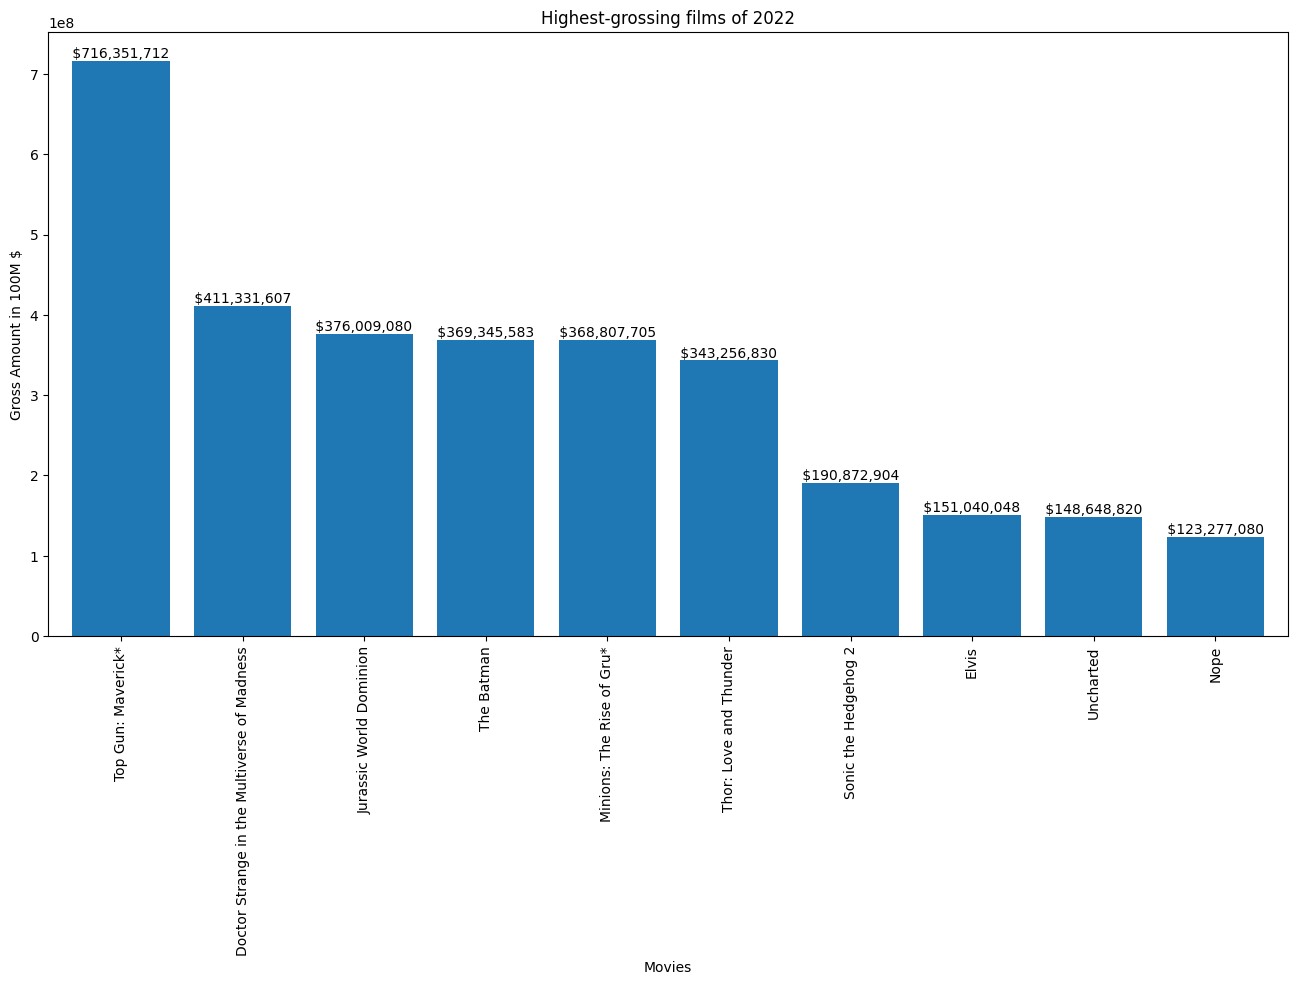

In [95]:
x = df["Title"]
y = df["gross_amt"]

plt.figure(figsize=(16,8),dpi=100)
plt.title("Highest-grossing films of 2022")
plt.xlabel("Movies")
plt.ylabel("Gross Amount in 100M $")
plt.xticks(rotation=90)
plt.bar(x,y)
for i, (amt,a) in enumerate(zip(df["Domestic Gross"],y)):
    plt.text(i, a, f' {amt} ',
             ha='center', va='bottom', color='black',fontsize = 10)
plt.xlim(-0.6, len(x)-0.4)
plt.show()